# Regresión Logística

A partir de un conjunto de datos de entrada (características), nuestra **salida será discreta** y no continua. Utilizaremos Regresión Logística. Este es un algoritmo es un **Algoritmo Supervisado** y se utiliza en **clasificación**

In [25]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline
print('All done')

All done


In [5]:
dataframe = pd.read_csv('../data/usuarios_win_mac_lin.csv')
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [6]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [8]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


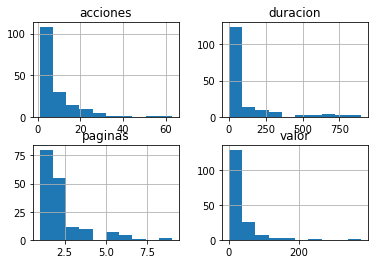

In [10]:
dataframe.drop(['clase'],1).hist()
plt.show()

C:\Users\sjvas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


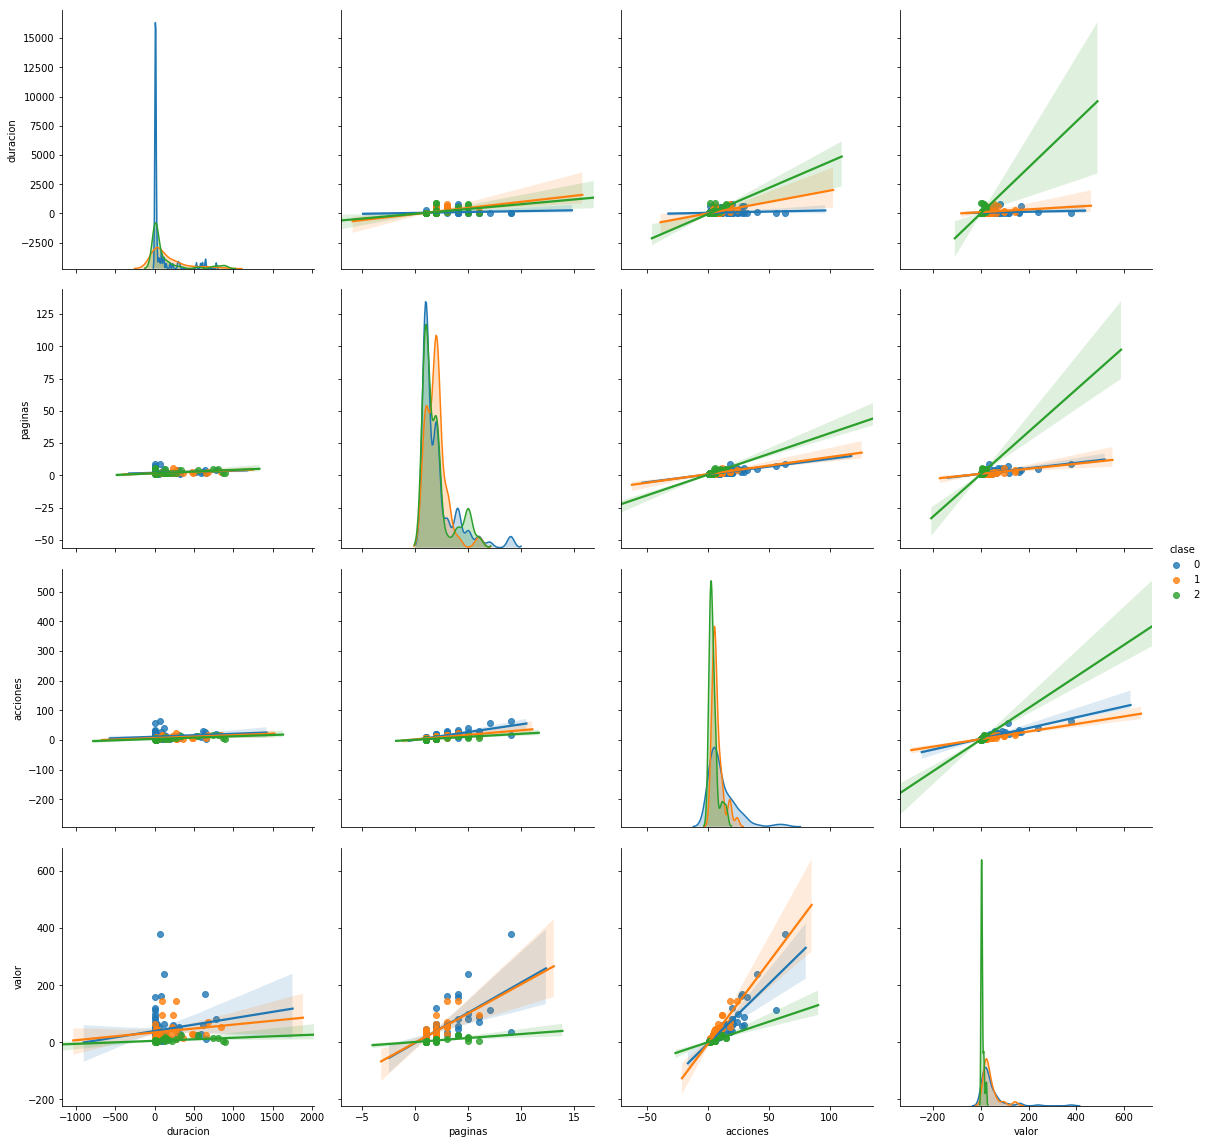

In [12]:
sns.pairplot(dataframe.dropna(), hue='clase', size=4,
            vars=['duracion','paginas','acciones','valor'], kind='reg')

## Creamos el modelo de Regresión Logística

In [13]:
x = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
x.shape

(170, 4)

In [15]:
model = linear_model.LogisticRegression()
model.fit(x,y)

C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = model.predict(x)
print(predictions[0:5])

[2 2 2 2 2]


In [20]:
# Medida de la precisión media de las predicciones
model.score(x,y)

0.7764705882352941

## Validación del modelo

In [30]:
validation_size = 0.2
seed = 7
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x,
                                                                      y,
                                                                      test_size=validation_size, 
                                                                      random_state=7)

In [32]:
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sjvas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

In [33]:
msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.743407 (0.115752)


In [40]:
predictions2 = model.predict(x_valid)
print(accuracy_score(y_valid, predictions2))

0.8529411764705882


In [41]:
print(confusion_matrix(y_valid, predictions2))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [42]:
print(classification_report(y_valid, predictions2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

   micro avg       0.85      0.85      0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



## Prediccion de nuevos valores

In [47]:
x_new = pd.DataFrame({'duracion':[10], 'paginas':[7],'acciones':[635],'valor':[19]})
model.predict(x_new)

array([2], dtype=int64)